### Project Overview
The notebook conducts a comparative analysis of three major clustering algorithms: K-Means, Agglomerative Hierarchical Clustering, and DBSCAN.
- Dataset: Pima Indians Diabetes Dataset.
- Goal: Cluster patients based on diagnostic measurements (Glucose, BMI, Insulin, etc.) after removing the known `Outcome` label.
- Best Model: Based on the Silhouette Score, DBSCAN achieved the best separation ($0.37$).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

### Data Loading and Preprocessing

In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df = data.copy()

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.drop('Outcome', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

### Feature Scaling

In [9]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Clustering Algorithms Analysis

##### K-Means Clustering

In [10]:
k_range = range(2, 10)
km_sse = []
km_score = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    
    km_sse.append(km.inertia_)

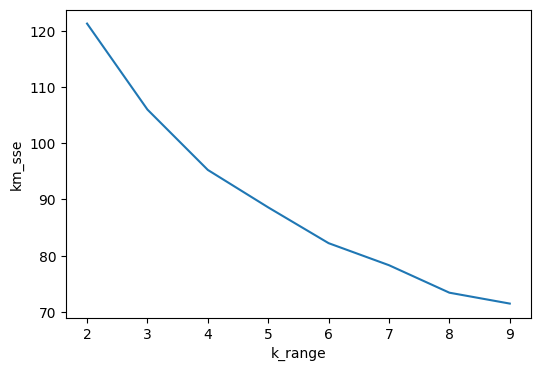

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, km_sse)
plt.xlabel('k_range')
plt.ylabel('km_sse')
plt.show()

In [12]:
km = KMeans(n_clusters=4, random_state=42)
km_label = km.fit_predict(df)
print('KMeans silhouette score: ', silhouette_score(df, km_label))

KMeans silhouette score:  0.2048057549090295


##### Agglomerative (Hierarchical) Clustering

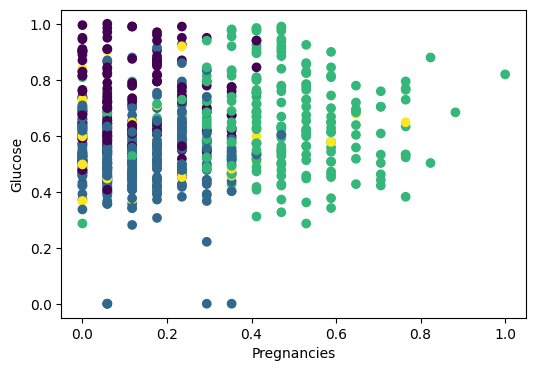

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=km_label)
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.show()

In [14]:
hier = AgglomerativeClustering(n_clusters=4, linkage='ward')
hier_label = hier.fit_predict(df)
print('Agglomerative silhouette score:', silhouette_score(df, hier_label))

Agglomerative silhouette score: 0.13834024104262388


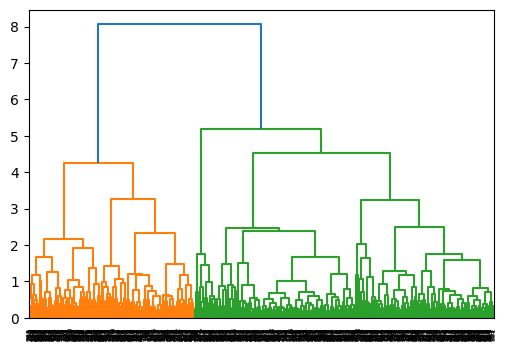

In [15]:
dfL = linkage(df, method='ward')
plt.figure(figsize=(6,4))
dendrogram(dfL)
plt.show()

##### DBSCAN (Density-Based Spatial Clustering)

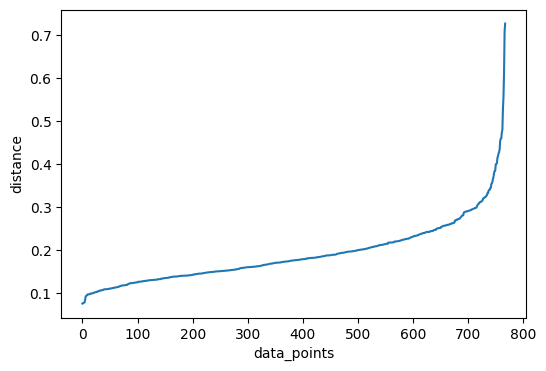

In [16]:
nn = NearestNeighbors(n_neighbors=3)
nn.fit(df)

distance, _ = nn.kneighbors(df)
k_dist = np.sort(distance[:, 2])

plt.figure(figsize=(6, 4))
plt.plot(k_dist)
plt.xlabel('data_points')
plt.ylabel('distance')
plt.show()

In [17]:
db = DBSCAN(eps=0.35, min_samples=5)
db_label = db.fit_predict(df)
print('DBSCAN silhouette score:', silhouette_score(df, db_label))

DBSCAN silhouette score: 0.3714208744614506


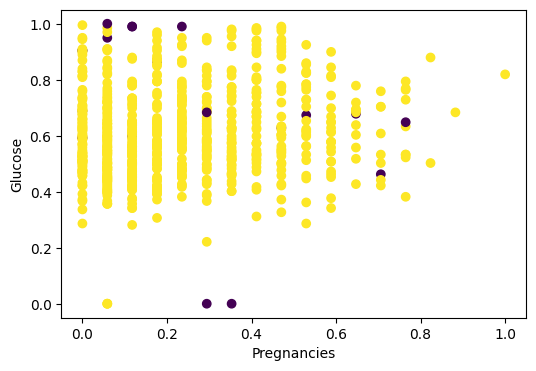

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=db_label)
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.show()

### Summary of Results based on Silhouette score

| Algorithm        | Configuration                     | Silhouette Score |
|------------------|-----------------------------------|------------------|
| K-Means          | k = 4                             | 0.2048           |
| Agglomerative    | k = 4, linkage = 'ward'           | 0.1383           |
| DBSCAN           | ε = 0.35, min_samples = 5         | 0.3714           |

- **Conclusion:** DBSCAN provided the highest quality clustering for this specific feature set and preprocessing method.